# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv('cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [3]:
df.shape

(103, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


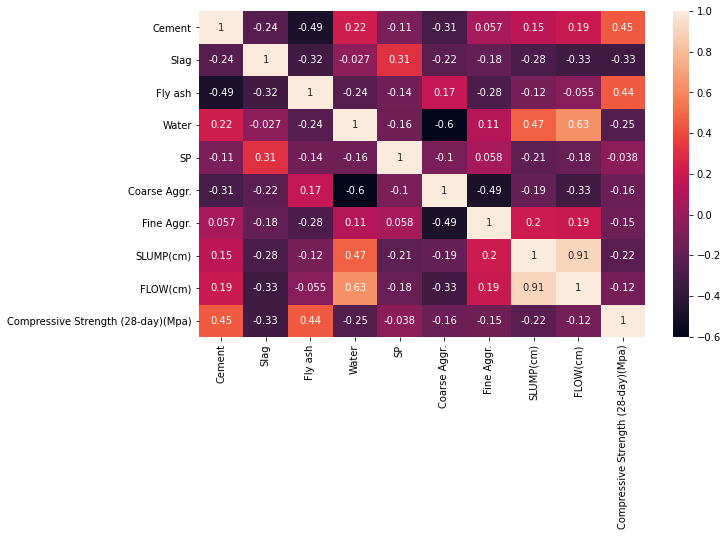

In [6]:
sns.heatmap(df.corr(), annot = True);

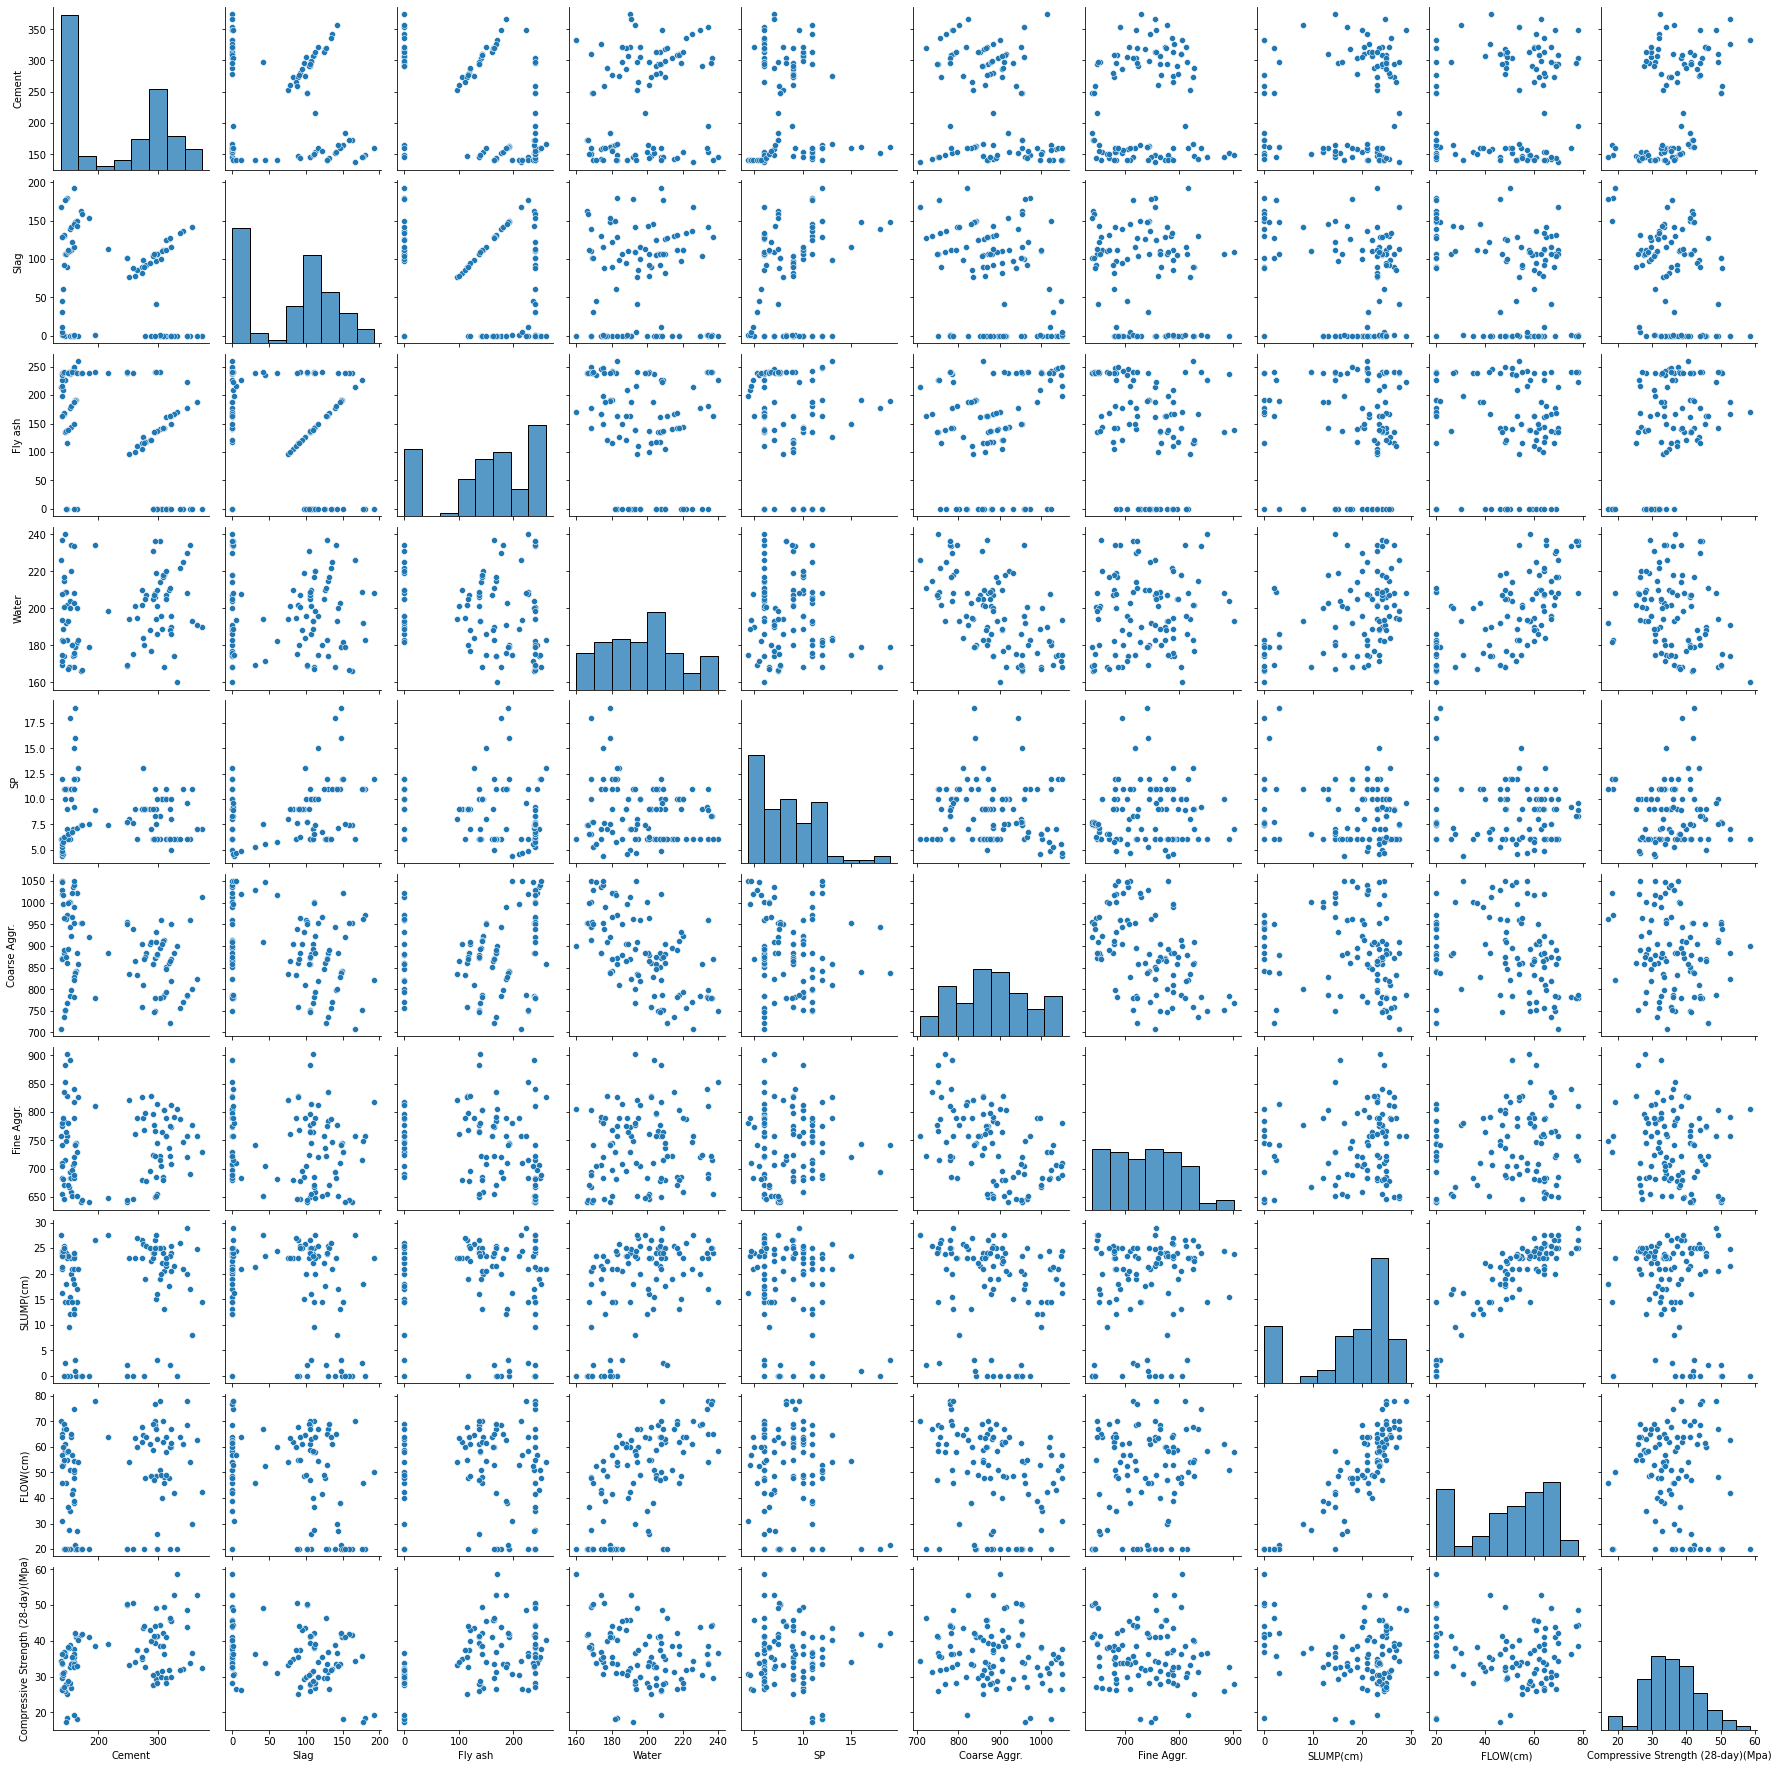

In [8]:
sns.pairplot(df);

In [7]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [9]:
df.corr()["Compressive Strength (28-day)(Mpa)"]

Cement                                0.446
Slag                                 -0.332
Fly ash                               0.444
Water                                -0.254
SP                                   -0.038
Coarse Aggr.                         -0.161
Fine Aggr.                           -0.155
SLUMP(cm)                            -0.223
FLOW(cm)                             -0.124
Compressive Strength (28-day)(Mpa)    1.000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

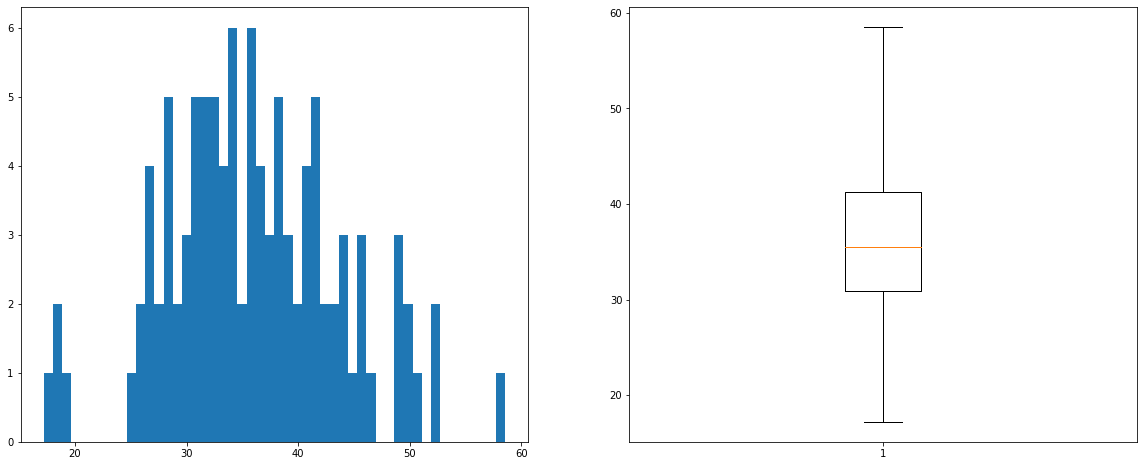

In [11]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.hist(df["Compressive Strength (28-day)(Mpa)"], bins=50)

plt.subplot(122)
plt.boxplot(df["Compressive Strength (28-day)(Mpa)"], whis=2.5)

plt.show()

# Data Preprocessing 

### Features and target variable

In [12]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
X.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000


In [13]:
y = df['Compressive Strength (28-day)(Mpa)']
y.head()

0   34.990
1   41.140
2   41.810
3   42.080
4   26.820
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Splitting data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=101)

In [18]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


In [70]:
def plot_relation(df, target_var):
    subp = 331
    plt.figure(figsize=([15, 15]))
    for col in df.columns:
        if col != target_var:
            plt.subplot(subp)
            sns.regplot(x=col, y=target_var, data=df)
            subp += 1
    plt.tight_layout()

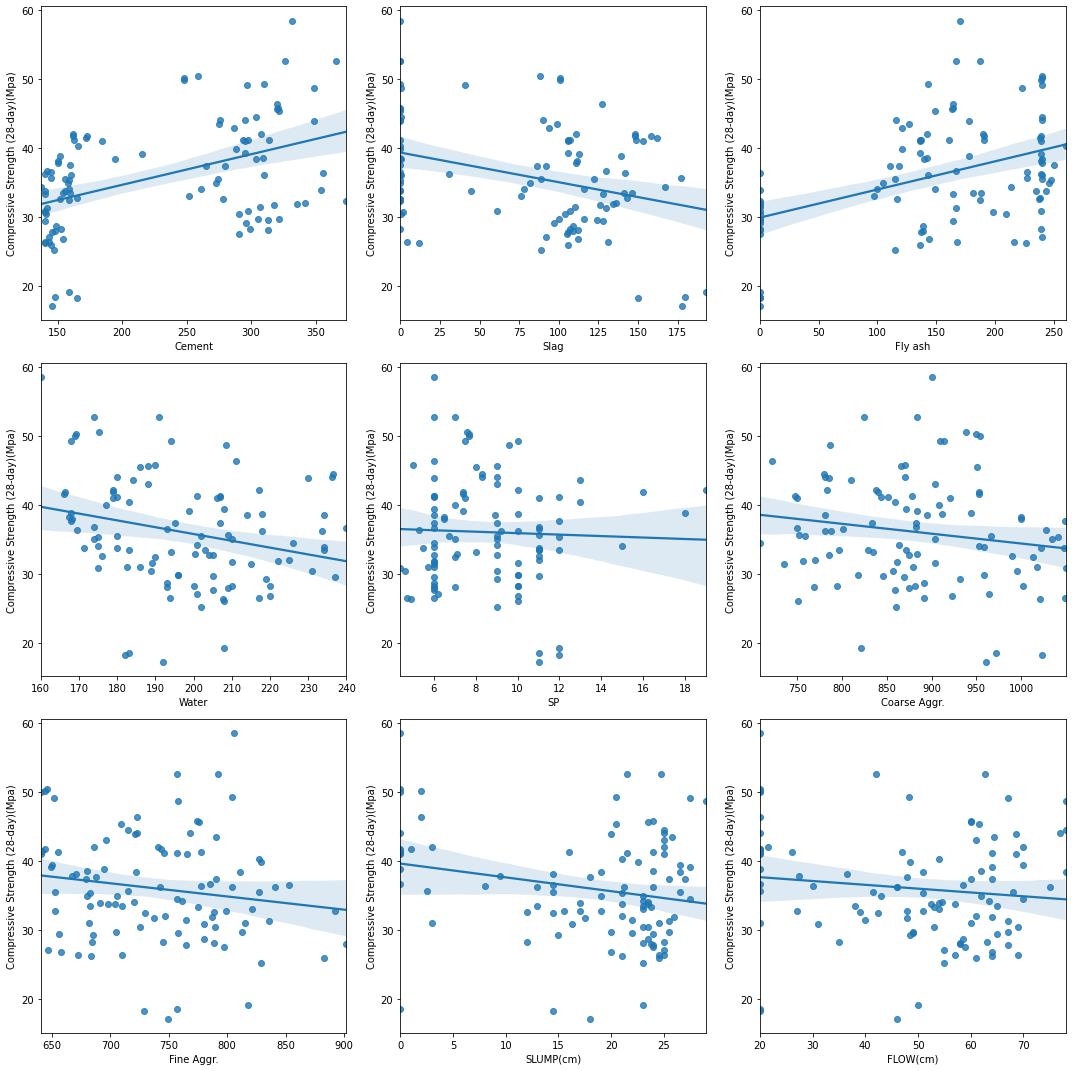

In [71]:
plot_relation(df,"Compressive Strength (28-day)(Mpa)" )

In [72]:
#alternatively
def plot_relation2(df, target_var):
    f, axs = plt.subplots(3, 3, figsize=(15, 15))
    c = 0
    for i in range(3):
        for j in range(3):
            if df.columns[c] != target_var:
                sns.regplot(x=df.columns[c],
                            y=target_var,
                            data=df,
                            ax=axs[i][j])
            c += 1
    plt.tight_layout()

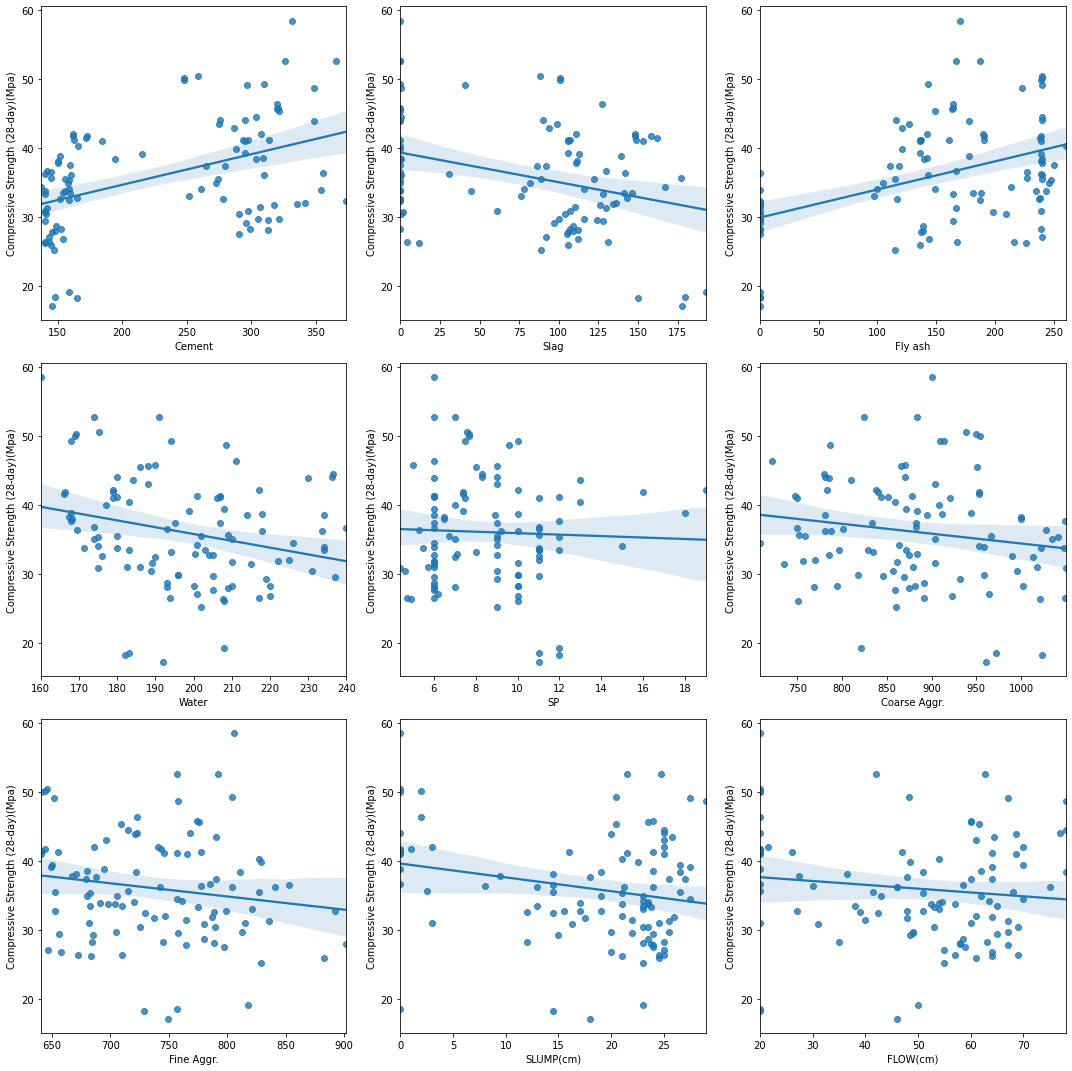

In [73]:
plot_relation2(df,"Compressive Strength (28-day)(Mpa)" )

In [ ]:
# alternative 3 

In [76]:
def plot_relation3(df, target_var, shape, figsize=(15,15)):
    f, axs = plt.subplots(shape[0], shape[1], figsize=figsize)
    c = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            if df.columns[c] != target_var:
                sns.regplot(x=df.columns[c], y=target_var, data=df, ax=axs[i][j])
            c += 1
    plt.tight_layout()

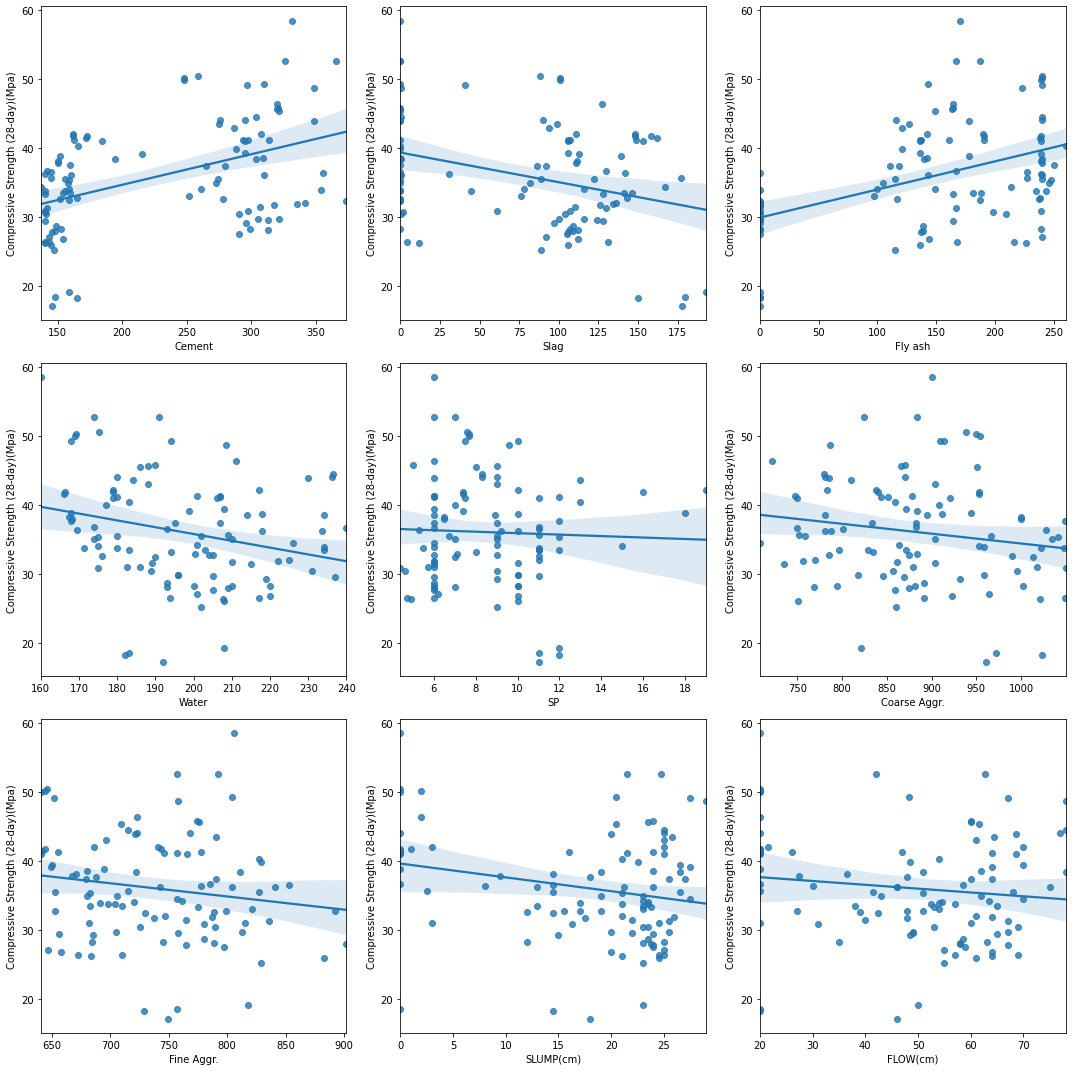

In [80]:
plot_relation3(df,"Compressive Strength (28-day)(Mpa)", shape = (3,3))

## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [25]:
scaler.fit(X_train) 

StandardScaler()

In [26]:
X_train_scaled = scaler.transform(X_train)  # Apply transform according to fit
X_train_scaled

array([[-0.97616308,  0.48761757,  1.0288507 , -1.52996498, -0.8426741 ,
         1.36869431, -1.00173811, -0.41697052, -0.75855243],
       [-0.92521387,  0.99821087,  0.31639166,  1.94157002,  1.10751454,
        -0.95666815, -0.82225804,  0.55516647,  0.87270893],
       [-1.03537432,  1.63645251, -1.91466518, -0.24440404,  1.10751454,
         0.92658836,  0.12539674, -0.01667882, -0.21479865],
       [ 1.19537472,  0.48071766, -0.16433329,  1.05677099,  0.67413928,
        -1.11743395, -0.77918282,  0.78390458,  1.15889513],
       [-1.00783421,  1.67095206, -1.91466518, -0.71282706,  1.10751454,
         1.05290435,  0.24026399, -2.07532186, -1.70296691],
       [-0.66633682,  1.29663196,  1.03747909, -1.57680728, -0.45263638,
         0.83012888, -1.38080002, -2.07532186, -1.70296691],
       [ 1.01636399,  0.39446879, -0.23829098,  0.58834798, -1.05936173,
        -0.10690607, -1.29608543,  0.95545817,  1.15889513],
       [ 1.15406455,  0.29097014, -1.91466518, -0.03621604,  0

In [27]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.77374326,  1.15345884, -1.91466518, -0.76487406,  1.54088979,
         1.63855119, -0.16177137, -0.41697052, -1.70296691],
       [-0.80128337,  1.13620907,  0.43965447, -0.86896806,  1.54088979,
        -0.42843767,  0.08232153, -2.07532186, -1.70296691],
       [ 1.58093628,  0.87746246, -1.91466518,  1.317006  , -1.05936173,
        -1.42748228,  0.67101616,  0.89827364,  0.81547169],
       [-1.11661765, -1.3615582 ,  0.74657887, -0.14551474, -1.62274956,
         1.94285788, -0.43314524,  0.72672005,  0.414811  ],
       [ 1.13754048, -1.43055729,  1.04117698,  2.06648282, -0.06259865,
        -1.15073544, -0.35848153,  0.78390458,  1.61679306],
       [ 0.9199736 , -1.43400725, -0.42318519, -1.02510907, -0.62598648,
         0.31797498,  1.27406921,  0.49798194, -0.07170554],
       [-1.11110963, -0.38004606,  1.03008333, -0.73885056, -1.18937431,
         1.57768985, -0.84523149,  0.72672005,  0.58652273],
       [ 1.20914477, -1.43400725, -0.16433329,  1.10881799,  0

### checking std = 1 and mean = 0

In [28]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [29]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

### 1.1 Interpret the model

In [31]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

### 1.2 Model Evaluation

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [34]:
ls = train_val(y_train, y_train_pred, y_test, y_pred,
               "linear")  # Evaluate the result. Overfitting?
ls

,linear_train,linear_test
R2,0.914,0.880
mae,1.823,2.305
mse,4.952,8.184
rmse,2.225,2.861


In [35]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,18.260,17.521,0.739
1,41.140,38.473,2.667
69,31.900,32.796,-0.896
80,26.420,28.932,-2.512
92,44.480,46.682,-2.202
61,39.930,39.340,0.590
85,30.970,33.248,-2.278
53,38.590,39.465,-0.875
88,37.920,37.323,0.597
32,52.650,51.968,0.682


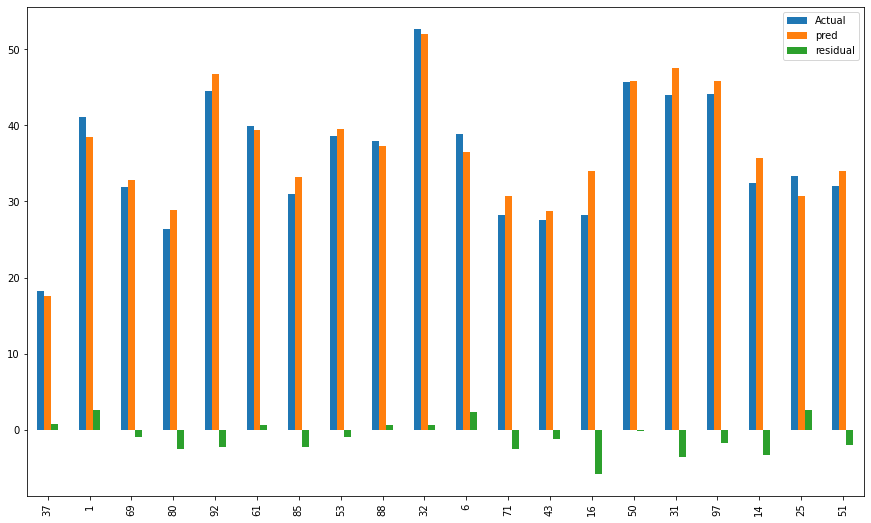

In [36]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

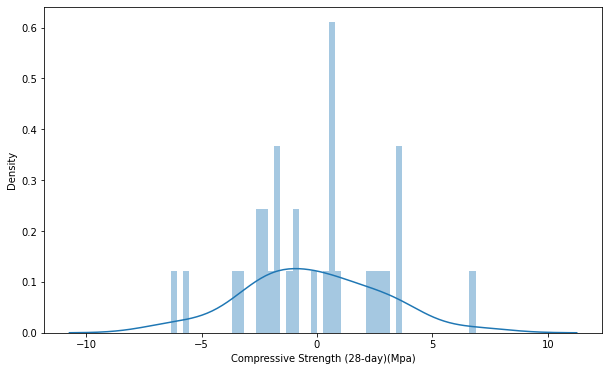

In [38]:
#Residuals
sns.distplot((y_test-y_pred),bins=50); 

In [37]:
lm.coef_

array([ 4.74686383e+00, -1.59603568e+00,  4.27289463e+00, -3.51003342e+00,
       -1.07837026e-05, -3.97955808e+00, -2.20767067e+00, -1.77445961e+00,
        1.16528703e+00])

# 2. Regularization

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [41]:
lr = LinearRegression()

lr.fit(X_train_scaled,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lr.predict(X_train_scaled)))
print("TEST : ", mean_absolute_error(y_test, lr.predict(X_test_scaled)))

TRAIN:  1.8234842785987655
TEST :  2.3051105405183017


## 2.1 Ridge (Apply and evaluate)

In [42]:
rr = RidgeCV()

rr.fit(X_train_scaled,y_train)

print("TRAIN: ", mean_absolute_error(y_train, rr.predict(X_train_scaled)))
print("TEST : ", mean_absolute_error(y_test, rr.predict(X_test_scaled)))

TRAIN:  1.8064203200506475
TEST :  2.3275287229621995


In [49]:
 # Alternative 

In [45]:
ridge_model = Ridge(alpha=1, random_state=42)

In [46]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [47]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [48]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.913,0.875
mae,1.806,2.328
mse,4.989,8.577
rmse,2.234,2.929


### Comparing Linear vs Ridge

In [50]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.914,0.880,0.913,0.875
mae,1.823,2.305,1.806,2.328
mse,4.952,8.184,4.989,8.577
rmse,2.225,2.861,2.234,2.929


## 2.2 Lasso (Apply and evalute)

In [43]:
lsr = LassoCV()

lsr.fit(X_train_scaled,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr.predict(X_train_scaled)))
print("TEST : ", mean_absolute_error(y_test, lsr.predict(X_test_scaled)))

TRAIN:  1.8326689664931426
TEST :  2.6327507467250464


In [51]:
# alternative 

In [52]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [53]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [54]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.805,0.662
mae,2.652,4.003
mse,11.209,23.168
rmse,3.348,4.813


### Comparing Linear, Ridge, and Lasso

In [56]:
pd.concat([ls, rs, lss], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.914,0.880,0.913,0.875,0.805,0.662
mae,1.823,2.305,1.806,2.328,2.652,4.003
mse,4.952,8.184,4.989,8.577,11.209,23.168
rmse,2.225,2.861,2.234,2.929,3.348,4.813


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [59]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [60]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          verbose=2)

In [61]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [62]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.1}

In [63]:
grid_model.best_index_

7

In [64]:
grid_model.best_score_

-2.619325784852548

### Using Best Hyper Parameters From GridSearch

In [65]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [67]:
grr = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
grr 

,GridSearch_train,GridSearch_test
R2,0.913,0.876
mae,1.806,2.324
mse,4.978,8.512
rmse,2.231,2.918


### Comparing Linear, Ridge, Lasso, and Elastic-Net(GridSearch) 

In [69]:
pd.concat([ls, rs, lss, grr], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,GridSearch_train,GridSearch_test
R2,0.914,0.880,0.913,0.875,0.805,0.662,0.913,0.876
mae,1.823,2.305,1.806,2.328,2.652,4.003,1.806,2.324
mse,4.952,8.184,4.989,8.577,11.209,23.168,4.978,8.512
rmse,2.225,2.861,2.234,2.929,3.348,4.813,2.231,2.918
